<font size="10">MID TERM PROJECT</americantypewriter> 

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA

We shouldn't limit our EDA to these 10 questions. Let's be creative :).

<font size="5">Import Libraries</Arial>

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
pd.set_option('display.max_columns',False)

<font size="5">Connecting to Database</Arial>

In [2]:
connection = psycopg2.connect(
    host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
    database="mid_term_project",
    user="lhl_student",
    password="lhl_student",
    port=5432)

In [3]:
df_passengers = pd.read_sql_query('SELECT * FROM passengers ORDER BY RANDOM() LIMIT 3000;', connection)
df_passengers.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [4]:
df_fuel_comsumption = pd.read_sql_query('SELECT * FROM fuel_comsumption ORDER BY RANDOM() LIMIT 3000;', connection)
df_fuel_comsumption.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [5]:
df_flights = pd.read_sql_query('SELECT * FROM flights ORDER BY RANDOM() LIMIT 3000;', connection)
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [6]:
df_flights.shape

(3000, 42)

In [7]:
df_passengers.isnull().values.any()

False

<font size="5">CLEAN AND PREPARE DATA</font>

In [8]:
df_flights.isnull().values.any()

True

In [9]:
df_flights.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
branded_code_share        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                  6
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                 40
dep_delay                40
taxi_out                 44
wheels_off               44
wheels_on                46
taxi_in                  46
crs_arr_time              0
arr_time                 45
arr_delay                54
cancelled                 0
cancellation_code      2835
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time      53
air_time                 54
flights                   0
distance                  0
carrier_delay          2405
weather_delay          2405
nas_delay           

<font size="5">DROPPING COLUMNS</font>

In [10]:
#testing - dropping one column
#df_flights = df_flights.drop('no_name', axis=1)

In [11]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [12]:
df_flights[["fl_date"]].head(4)

,fl_date
0,2019-07-25
1,2018-04-19
2,2019-07-04
3,2018-07-27


<font size="5">DROPPING REST OF COLUMNS THAT ARE NOT RELEVANT</font>

In [13]:
#separate the columns required

df_flights=df_flights.drop(columns=['branded_code_share', 'mkt_carrier'])

In [14]:
df_flights

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-07-25,UA,6069,YV,N501MJ,6069,12339,IND,"Indianapolis, IN",12264,IAD,"Washington, DC",550,547.0,-3.0,14.0,601.0,710.0,6.0,722,716.0,-6.0,0.0,None,0.0,N,92.0,89.0,69.0,1.0,476.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-04-19,AA,2548,AA,N970NN,2548,14908,SNA,"Santa Ana, CA",11298,DFW,"Dallas/Fort Worth, TX",1615,1610.0,-5.0,11.0,1621.0,2041.0,13.0,2111,2054.0,-17.0,0.0,None,0.0,N,176.0,164.0,140.0,1.0,1205.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-07-04,DL,396,DL,N935DN,396,13244,MEM,"Memphis, TN",10397,ATL,"Atlanta, GA",600,557.0,-3.0,12.0,609.0,800.0,4.0,812,804.0,-8.0,0.0,None,0.0,N,72.0,67.0,51.0,1.0,332.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-07-27,DL,2700,DL,N969AT,2700,11433,DTW,"Detroit, MI",11057,CLT,"Charlotte, NC",1011,1007.0,-4.0,14.0,1021.0,1136.0,10.0,1202,1146.0,-16.0,0.0,None,0.0,N,111.0,99.0,75.0,1.0,500.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-03-13,DL,1617,DL,N993DL,1617,10397,ATL,"Atlanta, GA",11042,CLE,"Cleveland, OH",2106,2100.0,-6.0,20.0,2120.0,2238.0,11.0,2259,2249.0,-10.0,0.0,None,0.0,N,113.0,109.0,78.0,1.0,554.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2018-09-22,AS,254,AS,N483AS,254,14057,PDX,"Portland, OR",14747,SEA,"Seattle, WA",2055,2044.0,-11.0,15.0,2059.0,2132.0,17.0,2148,2149.0,1.0,0.0,None,0.0,N,53.0,65.0,33.0,1.0,129.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2996,2019-03-08,DL,2408,DL,N978AT,2408,11057,CLT,"Charlotte, NC",10397,ATL,"Atlanta, GA",705,658.0,-7.0,29.0,727.0,813.0,5.0,824,818.0,-6.0,0.0,None,0.0,N,79.0,80.0,46.0,1.0,226.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2997,2018-05-04,NK,892,NK,N683NK,892,13204,MCO,"Orlando, FL",11433,DTW,"Detroit, MI",1823,1820.0,-3.0,13.0,1833.0,2037.0,10.0,2105,2047.0,-18.0,0.0,None,0.0,N,162.0,147.0,124.0,1.0,957.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2998,2019-03-10,AA,5291,OH,N517AE,5291,11057,CLT,"Charlotte, NC",11617,EWN,"New Bern/Morehead/Beaufort, NC",1801,1759.0,-2.0,8.0,1807.0,1845.0,4.0,1905,1849.0,-16.0,0.0,None,0.0,N,64.0,50.0,38.0,1.0,221.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [15]:
df_flights.dtypes

fl_date                 object
mkt_unique_carrier      object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance               float64
carrier_delay          float64
weather_

In [16]:
df_flights.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                  6
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                 40
dep_delay                40
taxi_out                 44
wheels_off               44
wheels_on                46
taxi_in                  46
crs_arr_time              0
arr_time                 45
arr_delay                54
cancelled                 0
cancellation_code      2835
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time      53
air_time                 54
flights                   0
distance                  0
carrier_delay          2405
weather_delay          2405
nas_delay              2405
security_delay         2405
late_aircraft_delay 

In [17]:
#df_flights['tail_num'].nunique()

In [18]:
missing_df = df_flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df_flights.shape[0]-missing_df['missing values'])/df_flights.shape[0]*100

In [19]:
df_flights.shape[0]

3000

In [20]:
missing_df['missing values'].sum()

27148

In [21]:
missing_df

,variable,missing values,filling factor (%)
0,fl_date,0,100.000000
1,mkt_unique_carrier,0,100.000000
2,mkt_carrier_fl_num,0,100.000000
3,op_unique_carrier,0,100.000000
4,tail_num,6,99.800000
5,op_carrier_fl_num,0,100.000000
6,origin_airport_id,0,100.000000
7,origin,0,100.000000
8,origin_city_name,0,100.000000
9,dest_airport_id,0,100.000000


In [22]:
df_flights=df_flights.dropna()

In [23]:
df_flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
cancellation_code      0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0
no_name                0


In [24]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'no_name'],
      dtype='object')

In [25]:
type(df_flights)

pandas.core.frame.DataFrame

In [26]:
df_flights.dtypes

fl_date                 object
mkt_unique_carrier      object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance               float64
carrier_delay          float64
weather_

In [27]:
df_flights.to_csv('/Users/annajose/Downloads/final_cleaned_flights.csv')

<font size="5">TASK 1</font>

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

<font size="5">Method 1 for arr_delay & dep_delay</font>

In [28]:
df_flights['arr_delay'].mean()

nan

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47, 

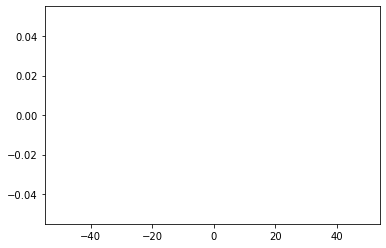

In [29]:
plt.hist(df_flights['arr_delay'], range(-50,50))

In [30]:
df_flights['dep_delay'].mean()

nan

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47, 

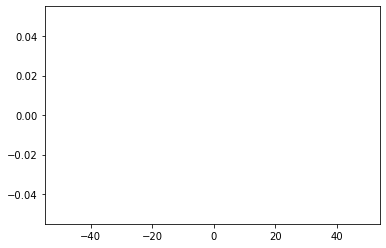

In [31]:
plt.hist(df_flights['dep_delay'], range(-50,50))

<font size="5">Method 2: Shapiro Test Method for arr_delay & dep_delay</font>

In [32]:
from scipy import stats

In [33]:
arr_delay = df_flights['arr_delay']
stats.shapiro(arr_delay)

ValueError: Data must be at least length 3.

In [ ]:
sns.histplot(arr_delay)
plt.xlim(-300,300)
plt.show()

In [ ]:
dep_delay = df_flights['dep_delay']
stats.shapiro(dep_delay)

In [ ]:
sns.histplot(dep_delay)
plt.xlim(-300,300)
plt.show()

<font size="5">TASK 2</font>

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
#Yes, average/median monthly delay is different during the year! 
#Weather is the cause of delay in Winter(FEB) and Volume of passengers is the cause of delay in Summer (JULY).
#Note: The months I concluded above seem to be changing when I run the code each time.

df_flights['month'] = df_flights['fl_date'].str[5:7]
df_flights['month']

In [ ]:
df_flights.groupby(by='month')['arr_delay'].mean()

In [ ]:
df_flights.groupby(by='month')['dep_delay'].mean()

<font size="5">TASK 3</font>

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [ ]:
#Conclusion: Do not have enough access to API data
#(Need to still finish Task 3)
import requests
import os
from IPython.display import JSON

api_key="PAVYNZRACTUFXVZ2NKY7J9UXT"

#api_key=os.environ['']
#from pywwo import *
#setKey('961245677bdc4428974231330210703', 'free')
#w=LocalWeather('seattle')

In [ ]:
#### REFORMAT DATE AND TIME FOR VISUAL CROSSING

def format_departure_time(x):
    str_time = str(x['crs_dep_time'])
    new_time = str_time.rjust(4, '0')
    return x['fl_date'] + 'T' + new_time[0:2] + ':' + new_time[2:4] + ':00'

def format_arrival_time(x):
    str_time = str(x['crs_arr_time'])
    new_time = str_time.rjust(4, '0')
    return x['fl_date'] + 'T' + new_time[0:2] + ':' + new_time[2:4] + ':00'

df_flights['new_dep_time'] = df_flights.apply(format_departure_time, axis=1)
df_flights['new_arr_time'] = df_flights.apply(format_arrival_time, axis=1)

In [ ]:
#### GET WEATHER FROM ORIGIN

def get_weather_origin(x):
    response = requests.get(
        'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history',
        params={
            'aggregateHours': '1',
            'startDateTime': x['new_dep_time'],
            'unitGroup': 'us',
            'contentType': 'json',
            'locations': x['origin_city_name'],
            'key': api_key
        }
    )
    
    if response.status_code == 200:
        json = response.json()
        for i in json['locations'].values():
            for j in i['values']:
                return j['conditions']

In [ ]:
#### GET WEATHER FROM DESTINATION

def get_weather_destination(x):
    response = requests.get(
        'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history',
        params={
            'aggregateHours': '1',
            'startDateTime': x['new_arr_time'],
            'unitGroup': 'us',
            'contentType': 'json',
            'locations': x['dest_city_name'],
            'key': api_key
        }
    )
    
    if response.status_code == 200:
        json = response.json()
        for i in json['locations'].values():
            for j in i['values']:
                return j['conditions']

In [ ]:
tmp_df = df_flights.iloc[500:510,:].copy()
tmp_df['weather_condition_origin'] = tmp_df.apply(get_weather_origin, axis=1)
tmp_df['weather_condition_dest'] = tmp_df.apply(get_weather_destination, axis=1)

In [ ]:
tmp_df

In [ ]:
#print (date_dict['2021-1-26'])

In [ ]:
#a = get_weather_origin('toronto', 'date')
#a
#a.json()['days'][0]['conditions']

In [ ]:
#JSON(a.json())

In [ ]:
#a.json()['days']

In [ ]:
#def response_json(a):
#    json = a.json()
#    for i in json['days']:
#        conditions_list=[]
#        conditions_list.append(i['conditions'])
#        return conditions_list

In [ ]:
#cond_list = response_json(a)

In [ ]:
#a.json()

In [ ]:
#cond_df=pd.DataFrame(cond_list, date_list)

In [ ]:
#cond_df

In [ ]:
#response_json(a)

In [ ]:
#df_flights=df_flights.apply(get_weather_origin(city_name, date_str), axis=1)

<font size="5">TASK 4</font>

<font size="5">CORRECT METHOD</font>

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [ ]:
#Here we are Creating "arrive hour of day" and "depart hour of day" columns

In [ ]:
from datetime import datetime
df_flights['arr_hour_of_day'] = df_flights[df_flights['arr_time'].notna()].apply(
    lambda x: 0 if x['arr_time'] == 2400.0 else datetime.strptime(str(int(x['arr_time'])).zfill(2), '%H%M').time().hour, axis=1)
df_flights['arr_hour_of_day'].head()

In [ ]:
df_flights['dep_hour_of_day'] = df_flights[df_flights['dep_time'].notna()].apply(
    lambda x: 0 if x['dep_time'] == 2400.0 else datetime.strptime(str(int(x['dep_time'])).zfill(2), '%H%M').time().hour, axis=1)
df_flights['dep_hour_of_day'].head()

In [ ]:
df_flights.shape

In [ ]:
#Creating taxi in by hour dataframe

In [ ]:
taxi_in_by_hour = df_flights.groupby('arr_hour_of_day').agg(avg_taxi_in=('taxi_in', 'median')).reset_index()
taxi_in_by_hour = taxi_in_by_hour.rename(columns={"arr_hour_of_day": "hour_of_day", "avg_taxi_in": "avg_taxi"}, errors="raise")
taxi_in_by_hour

In [ ]:
taxi_out_by_hour = df_flights.groupby(
    'dep_hour_of_day').agg(avg_taxi_out=('taxi_out', 'median')).reset_index()
taxi_out_by_hour = taxi_out_by_hour.rename(columns={"dep_hour_of_day": "hour_of_day", "avg_taxi_out": "avg_taxi"}, errors="raise")
taxi_out_by_hour

In [ ]:
#Combining the taxi data frames to plot the results

In [ ]:
total_taxi_by_hour = taxi_in_by_hour.append(taxi_out_by_hour, ignore_index=True)
total_taxi_by_hour = total_taxi_by_hour.groupby(
    'hour_of_day').agg(avg_taxi=('avg_taxi', 'median')).reset_index()
total_taxi_by_hour

In [ ]:
import numpy as np
#import plotly.express as px
import matplotlib.pyplot as plt

plt.plot(total_taxi_by_hour["hour_of_day"], total_taxi_by_hour["avg_taxi"])
plt.title('Average Taxiing Time per Hour')
plt.xlabel('hour_of_day')
plt.ylabel('avg_taxi')
plt.show()

#fig = px.bar(total_taxi_by_hour, 
#             title='Average Taxiing Time per Hour',
#             x='hour_of_day', 
#             y='avg_taxi',
#             labels = {'avg_taxi': 'Average Taxiing Time in Minutes', 'hour_of_day':'Hour of Day (24 hours)'})
#fig.show()

In [ ]:
#I think I would go with the colorful barplot below! :)
#Average taxiing happens more at midnight

In [ ]:
sns.barplot(total_taxi_by_hour["hour_of_day"], total_taxi_by_hour["avg_taxi"])
plt.xticks(rotation=45)
plt.show()

<font size="5">ALTERNATE METHOD</font>

In [ ]:
df_flights['dep_time_hh'] = df_flights['dep_time'] // 100
df_flights['dep_time_h'].describe()

In [ ]:
df_flights['dep_time_hh'] = df_flights["dep_time_hh"].replace(24.0, 0.0)

In [ ]:
df_flights.groupby(by='dep_time')['taxi_out'].mean()

In [ ]:
df_flights.groupby(by='dep_time_hh')['taxi_in'].mean()

<font size="5">TASK 5</font>

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [ ]:
#If your plane is running late, it tends to fly faster

In [ ]:
dep_delay_minus_arr_delay = df_flights['dep_delay'] - df_flights['arr_delay']

In [ ]:
df_flights['dep_delay_minus_arr_delay'] = dep_delay_minus_arr_delay

In [ ]:
plt.hist(df_flights['dep_delay_minus_arr_delay'], range(-50,50))

In [ ]:
df_flights['dep_delay_minus_arr_delay'].describe()

<font size="5">TASK 6</font>

#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
df_flights['dest_city_name'] = df_flights.apply(
    lambda x: (x['dest_city_name'].split(",")[1].strip()), axis=1)   
dest = df_flights['dest_city_name']
dest.head()

In [ ]:
states = dest.loc(axis=0)[:,1]

In [ ]:
states.value_counts().head()

<font size="5">TASK 7</font>

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
#Here I am getting plane speed vs flight delay (distance in miles, actual elapsed time in minutes)
#Conclusion: Flight delay is not affected by the speed
df_flights['flight_speed'] = df_flights.apply(
    lambda x: ((x['distance'] / (x['actual_elapsed_time']/60)
              )),  axis=1)
df_flights.head()

In [ ]:
import numpy as np
#from fbprophet.plot import plot_plotly as go
#import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
flights_completed = df_flights[(
    (df_flights['cancelled'] == 0) & (df_flights['diverted'] == 0)
)]

plot_sample = flights_completed.sample(frac=0.015, random_state=1)

fig = go.Figure(data=[go.Scatter(
    x=plot_sample['flight_speed'],
    y=plot_sample['dep_delay'],
    mode='markers',
    marker_size=np.full((19569), 5.5))    
])

fig.update_layout(
    title="Flights Delay vs Flight Speed",
    xaxis_title="Flight Speed (Miles per Hour)",
    yaxis_title="Flight Departure Delay (Minutes)"
)
fig.show()
py.plot(fig)

#My scatter plot keeps opening in a new tab

<font size="5">TASK 8</font>

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
#Create feature Flight Haul Type
#Short-haul flight < 3 hours
#Medium-haul between 3-6 hours
#Long-haul flight > 6 hours

In [ ]:
print("Actual Elapsed Time datatype", df_flights['actual_elapsed_time'].dtypes)
print(df_flights['actual_elapsed_time'].isnull().values.any())
print("Flights with no elapsed time", df_flights['actual_elapsed_time'].isna().sum())
print(df_flights['crs_elapsed_time'].isna().sum())
print(df_flights['air_time'].isna().sum())
print("Flights Cancelled", df_flights[df_flights['cancelled'] == 1]['cancelled'].sum())
print("Flights Diverted", df_flights[df_flights['diverted'] == 1]['diverted'].sum())

In [ ]:
# 0 - SHORT HAUL
# 1 - MEDIUM HAUL
# 2 - LONG HAUL
flights_completed = df_flights[(
    (df_flights['cancelled'] == 0) & (df_flights['diverted'] == 0)
)]

print(flights_completed['actual_elapsed_time'].isnull().values.any())

df_flights['haul_type'] = flights_completed.apply(
    lambda x: 0 if x['actual_elapsed_time'] <= 180.0 else (2 if x['actual_elapsed_time'] >= 360.0 else 1), axis=1
)

In [ ]:
df_flights[['actual_elapsed_time','haul_type']].head()

In [ ]:
#Group data by hour of departure and haul type

In [ ]:
from datetime import datetime
df_flights['dep_hour_of_day'] = df_flights[df_flights['dep_time'].notna()].apply(
    lambda x: 0 if x['dep_time'] == 2400.0 else datetime.strptime(str(int(x['dep_time'])).zfill(4), '%H%M').time().hour, axis=1)
df_flights['dep_hour_of_day'].head()

In [ ]:
df_flights['dep_hour_of_day'].describe()

In [ ]:
haul_type_by_hour = df_flights.groupby(
    ['dep_hour_of_day','haul_type']).agg(total_flights=('haul_type', 'count')).reset_index()
haul_type_by_hour.head()

In [ ]:
haul_type_by_hour.describe()

In [ ]:
haul_type_by_hour[haul_type_by_hour['dep_hour_of_day'] == 23].head()

In [ ]:
#Chart the aggregate dataframe as a bar graph

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(name="Short Haul", 
                     x=haul_type_by_hour['dep_hour_of_day'], 
                     y=haul_type_by_hour[haul_type_by_hour['haul_type'] == 0.0]['total_flights']))
fig.add_trace(go.Bar(name="Medium Haul", 
                     x=haul_type_by_hour['dep_hour_of_day'], 
                     y=haul_type_by_hour[haul_type_by_hour['haul_type'] == 1.0]['total_flights']))
fig.add_trace(go.Bar(name="Long Haul", 
                     x=haul_type_by_hour['dep_hour_of_day'], 
                     y=haul_type_by_hour[haul_type_by_hour['haul_type'] == 2.0]['total_flights']))
fig.update_layout(
    title='Flight Haul Type per Hour',
    xaxis_title="Hour of Day (24 hour)")
fig.show()
py.plot(fig)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

labels = haul_type_by_hour.dep_hour_of_day.unique()
short_haul = haul_type_by_hour[haul_type_by_hour['haul_type'] == 0.0]['total_flights']
medium_haul = haul_type_by_hour[haul_type_by_hour['haul_type'] == 1.0]['total_flights']
long_haul = haul_type_by_hour[haul_type_by_hour['haul_type'] == 2.0]['total_flights']

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x-0.4,short_haul, 0.4, label='Short')
rects2 = ax.bar(x, medium_haul, 0.4, label='Medium')
rects3 = ax.bar(x+0.4, long_haul, 0.4, label='Long')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Flights')
ax.set_xlabel('Hour of Day (24 hours)')
ax.set_title('Flight Haul Type per Hour')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

#fig.tight_layout()

plt.show()
fig.savefig('flight_haul_by_hour.png')


In [ ]:
#Print the hour of day with the max flights of each haul type

In [ ]:
idx_short = haul_type_by_hour[haul_type_by_hour['haul_type'] == 0]["total_flights"].idxmax()
row = haul_type_by_hour.iloc[idx_short]
print(row)

In [ ]:
idx_medium = haul_type_by_hour[haul_type_by_hour['haul_type'] == 1]["total_flights"].idxmax()
row = haul_type_by_hour.iloc[idx_medium]
print(row)

In [ ]:
idx_long = haul_type_by_hour[haul_type_by_hour['haul_type'] == 2]["total_flights"].idxmax()
row = haul_type_by_hour.iloc[idx_long]
print(row)

<font size="5">TASK 9</font>

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [ ]:
#Get top 10 airport ids
#Conclusion: Passenger counts not directly correlate with flight count at the top 10 busiest airports

In [ ]:
flights_by_airport = df_flights[['flights','origin_airport_id']].groupby('origin_airport_id').count().reset_index()
flights_by_airport.head()

In [ ]:
top_10_airports = flights_by_airport.sort_values(by='flights', ascending=False).head(10)
top_10_airports

In [ ]:
#def execute_read_query(con, airport_names_query_2019):

In [ ]:
def get_airport_names(airport_ids):
    airport_names_query_2019 = """
       SELECT distinct
        origin,
        origin_airport_id
       FROM flights
       WHERE date_part('year', TO_DATE(fl_date,'YYYY-MM-DD')) = 2019
       and origin_airport_id in (
    """
    airport_names_query_2019 += ",".join([str(item) for item in airport_ids]) + ")"
#return execute_read_query(con, airport_names_query_2019)

In [ ]:
top_10_flights_airports = get_airport_names(top_10_airports['origin_airport_id'].to_numpy())
top_10_flights_airports

In [ ]:
top_10_airport_names = df_flights.sort_values(by='origin_airport_id', ascending=False).head(10)
top_10_airport_names

In [ ]:
top_10_airports_by_flights = top_10_airport_names.join(top_10_airport_names.set_index('origin_airport_id'), on='origin_airport_id', rsuffix="dest")
top_10_airports_by_flights.head(10)

In [ ]:
#Get top airports for passenger total

In [ ]:
df_passengers['passengers'].unique()

In [ ]:
df_flights.arr_delay.mean()

In [ ]:
df_flights['month'] = df_flights['fl_date'].str[5:7]

In [ ]:
#Plot of arrival delay vs month
df_flights.groupby('month').arr_delay.mean().plot(kind='bar')

In [ ]:
df_flights['day'] = df_flights['fl_date'].str[8:10]

In [ ]:
#Plot of arrival delay vs day of month
df_flights.groupby('day').arr_delay.mean().plot(kind='bar')

In [ ]:
#Plot of arrival delay vs op unique carrier
df_flights.groupby('op_unique_carrier').arr_delay.mean().plot(kind='bar')

In [ ]:
df_flights.op_unique_carrier.value_counts()

In [ ]:
df_flights.groupby('op_carrier_fl_num').arr_delay.mean().plot()

In [ ]:
df_passengers.sort_values('passengers',ascending=False,inplace=True)
df_passengers.head(10)

<font size="5">TASK 10</font>

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
#Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [ ]:
df_flights['total_delay'] = df_flights.apply(
    lambda x: ((x['dep_delay'] + x['arr_delay'] +
                 x['carrier_delay'] +
                 x['weather_delay'] + x['nas_delay'] + x['security_delay'] +
                 x['late_aircraft_delay']
              )),  axis=1)

df_flights.shape

In [ ]:
#Find out distance covered monthly by different air carriers

In [ ]:
#Find out number of passengers that were carried by different air carriers

In [ ]:
#Find out total fuel comsumption per air carrier.

In [ ]:
#Find average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?